In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(43052)
x,_ = torch.randn(100).sort()
eps = torch.randn(100)*0.5
y = x * 4 + 2.5 + eps

In [ ]:
X = torch.stack([torch.ones(100),x],axis=1)
W = torch.tensor([[2.5],[4.0]])
y = X@W + eps.reshape(100,1)
x = X[:,[1]]

`# 경사하강법 (아이디어에서 좀 더 수식화)` -- $loss({\bf W})$를 최소로 만드는 ${\bf W}$를 컴퓨터로 구하는 방법, 즉 $\hat{\bf W} := \underset{\bf W}{\operatorname{argmin}} ~ loss({\bf W})$를 구하는 방법을 요약하면 아래와 같다.

`1`. 임의의 점 $\hat{\bf W}$를 찍는다.

`2`. 그 점에서 순간기울기를 구한다. 즉 $\frac{\partial}{\partial {\bf W}}loss({\bf W})$ 를 계산한다.

`3`. $\hat{\bf W}$에서의 순간기울기^[$\frac{\partial}{\partial {\bf W}}loss({\bf W})$]의 부호를 살펴보고 부호와 반대방향으로 움직인다. 이때 기울기의 절대값 크기^[$\left|\frac{\partial}{\partial {\bf W}}loss({\bf W})\right|$]와 비례하여 보폭(=움직이는 정도)을 각각 조절한다. 즉 아래의 수식에 따라 업데이트 한다.

$$\hat{\bf W} \leftarrow \hat{\bf W} - \alpha \times \frac{\partial}{\partial {\bf W}}loss({\bf W})$$

`#`

In [ ]:
What = torch.tensor([[-5.0],[10.0]])
What

tensor([[-5.],
        [10.]])

In [ ]:
yhat = X@What

In [ ]:
loss = torch.sum((y-yhat)**2)
loss

tensor(8587.6875)

In [ ]:
def l(w0, w1):
  yhat = w0 + w1 * x
  return torch.sum((y - yhat)**2) #loss함수(손실함수)만들기

In [ ]:
l(-5, 10)

tensor(8587.6875)

In [ ]:
def f(x):
  return x ** 2

In [ ]:
f(3)

9

In [ ]:
#(l(w0 + h, w1) - l(w0, w1)) / h 형태로 하면 미분이지.
h = 0.0001
print((l(-5 + h, 10) - l(-5, 10))/h)
print((l(-5, 10 + h) - l(-5, 10))/h)

tensor(-1337.8906)
tensor(1191.4062)


tensor(-1337.8906)

tensor(1191.4062)

In [ ]:
s1 = What - 0.001 * torch.tensor([[-1337.8906], [1191.4062]])
s1

tensor([[-3.6621],
        [ 8.8086]])

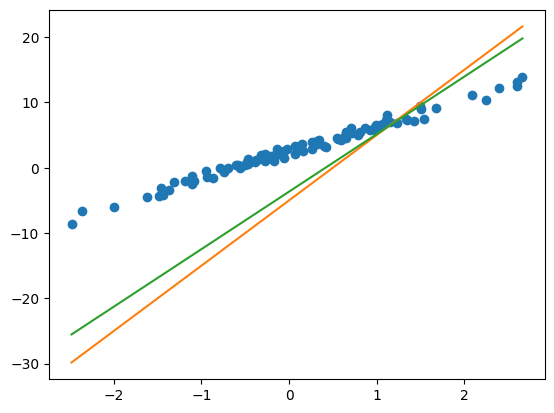

In [ ]:
plt.plot(x, y, 'o')
plt.plot(x, X@What, '-')
plt.plot(x, X@s1, '-')

In [ ]:
-2 * X.T @ y + 2 * X.T @ X @ What

tensor([[-1342.2522],
        [ 1188.9307]])

tensor(
  
        [[-1342.2522],
        
        [ 1188.9307]])

In [ ]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
yhat = X@What
loss = torch.sum((y-yhat)**2)
loss

tensor(8587.6875, grad_fn=<SumBackward0>)

`-` 여기에서 미분을 어떻게...?? 즉 아래를 어떻게 계산해..?

$$\frac{\partial}{\partial {\bf W}}loss({\bf W}):= \begin{bmatrix} \frac{\partial}{\partial w_0} \\ \frac{\partial}{\partial w_1}\end{bmatrix}loss({\bf W}) =  \begin{bmatrix} \frac{\partial}{\partial w_0}loss({\bf W}) \\ \frac{\partial}{\partial w_1}loss({\bf W})\end{bmatrix} $$

> `loss.backward()`를 실행하면 `What.grad`에 미분값이 업데이트 되어요!

In [ ]:
loss.backward() #loss를 꼬리표가 있게 한 What으로 미분해라.
#즉, What에 해당하는 접선의 기울기이다.

In [ ]:
print(What.grad)

tensor([[-1342.2524],
        [ 1188.9305]])


What = torch.tensor([[-5.0],[10.0]],requires_grad=True) #최초의 직선

yhat = X@What

loss = torch.sum((y-yhat)**2)

- update : 나중 W_hat = 원래 W_hat - 0.001 * What.grad

What.data = What.data - 0.001 * What.grad #update된 What

- 위의 yhat부터 계속 반복

In [ ]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True) #최초의 직선
for epoc in range(30):
  yhat = X@What
  loss = torch.sum((y-yhat)**2)
  loss.backward()
  #update : 나중 W_hat = 원래 W_hat - 0.001 * What.grad
  What.data = What.data - 0.001 * What.grad #update된 What
  What.grad = None #What.grad 값을 초기화해줘야한다!

What.grad = None #What.grad 값을 초기화해줘야한다!

왜냐하면

-> What.grad는 처음에 none으로 초기화되어 있음. loss.backward()를 실행하면 What.grad값이 What에서의 미분값으로 업데이트 된다. 즉, What.grad = What에서의 미분값인 셈이다.

-> 위는 사실이 아님!

-> 실제로는 **원래 있던 미분값을 그대로 유지한 후 What에서의 미분값을 더해서 갱신**하는 것이다!

즉, loss.backward()를 실행한 후 **What.grad = What.grad + What에서의 미분값**인 것이다.

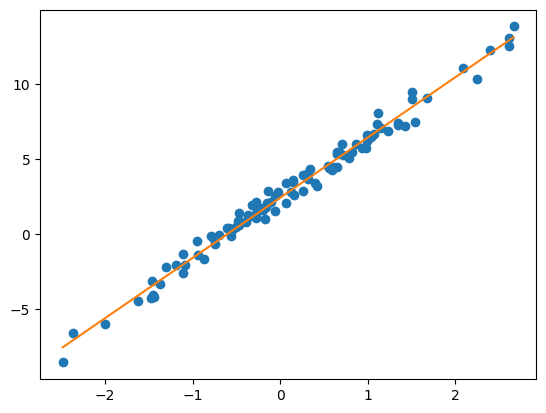

In [ ]:
plt.plot(x, y, 'o')
plt.plot(x, X@What.data, '-')

`# 경사하강법 (아이디어에서 좀 더 수식화)` -- $loss({\bf W})$를 최소로 만드는 ${\bf W}$를 컴퓨터로 구하는 방법, 즉 $\hat{\bf W} := \underset{\bf W}{\operatorname{argmin}} ~ loss({\bf W})$를 구하는 방법을 요약하면 아래와 같다.

`1`. 임의의 점 $\hat{\bf W}$를 찍는다.

`2`. 그 점에서 순간기울기를 구한다. 즉 $\frac{\partial}{\partial {\bf W}}loss({\bf W})$ 를 계산한다.

`3`. $\hat{\bf W}$에서의 순간기울기^[$\frac{\partial}{\partial {\bf W}}loss({\bf W})$]의 부호를 살펴보고 부호와 반대방향으로 움직인다. 이때 기울기의 절대값 크기^[$\left|\frac{\partial}{\partial {\bf W}}loss({\bf W})\right|$]와 비례하여 보폭(=움직이는 정도)을 각각 조절한다. 즉 아래의 수식에 따라 업데이트 한다.

$$\hat{\bf W} \leftarrow \hat{\bf W} - \alpha \times \frac{\partial}{\partial {\bf W}}loss({\bf W})$$

`#`

`-` 여기에서 미분을 어떻게...?? 즉 아래를 어떻게 계산해..?

$$\frac{\partial}{\partial {\bf W}}loss({\bf W}):= \begin{bmatrix} \frac{\partial}{\partial w_0} \\ \frac{\partial}{\partial w_1}\end{bmatrix}loss({\bf W}) =  \begin{bmatrix} \frac{\partial}{\partial w_0}loss({\bf W}) \\ \frac{\partial}{\partial w_1}loss({\bf W})\end{bmatrix} $$

편미분하라는 것!

> `loss.backward()`를 실행하면 `What.grad`에 미분값이 업데이트 되어요!

`-` 계산결과의 검토 (1)

- $loss({\bf W})=({\bf y}-\hat{\bf y})^\top ({\bf y}-\hat{\bf y})=({\bf y}-{\bf XW})^\top ({\bf y}-{\bf XW})$

- $\frac{\partial}{\partial {\bf W}}loss({\bf W})=-2{\bf X}^\top {\bf y}+2{\bf X}^\top {\bf X W}$

`-` 계산결과의 검토 (2)

$$\frac{\partial}{\partial {\bf W} } loss({\bf W})=\begin{bmatrix}\frac{\partial}{\partial w_0} \\ \frac{\partial}{\partial w_1} \end{bmatrix}loss({\bf W}) =\begin{bmatrix}\frac{\partial}{\partial w_0}loss(w_0,w_1) \\ \frac{\partial}{\partial w_1}loss(w_0,w_1) \end{bmatrix}$$

를 계산하고 싶은데 벡터미분을 할줄 모른다고 하자. 편미분의 정의를 살펴보면,

$$\frac{\partial}{\partial w_0}loss(w_0,w_1) \approx \frac{loss(w_0+h,w_1)-loss(w_0,w_1)}{h}$$

$$\frac{\partial}{\partial w_1}loss(w_0,w_1) \approx \frac{loss(w_0,w_1+h)-loss(w_0,w_1)}{h}$$

In [ ]:
def l(w0, w1):
  yhat = w0 + w1 * x
  return torch.sum((y - yhat)**2) #loss함수(손실함수)만들기

In [ ]:
#(l(w0 + h, w1) - l(w0, w1)) / h 형태로 하면 미분이지.
h = 0.0001
print((l(-5 + h, 10) - l(-5, 10))/h)
print((l(-5, 10 + h) - l(-5, 10))/h)

tensor(-1337.8906)
tensor(1191.4062)


In [ ]:
What.grad

`-` 이제 아래의 공식에 넣고 업데이트해보자

$$\hat{\bf W} \leftarrow \hat{\bf W} - \alpha \times \frac{\partial}{\partial {\bf W}}loss({\bf W})$$

In [ ]:
alpha = 0.001
print(f"{What.data} -- 수정전")
print(f"{-alpha*What.grad} -- 수정하는폭")
print(f"{What.data-alpha*What.grad} -- 수정후")
print(f"{torch.linalg.inv((X.T @ X)) @ X.T @ y} -- 회귀분석으로 구한값")
print(f"{torch.tensor([[2.5],[4]])} -- 참값(이건 비밀~~)")

tensor([[-5.],
        [10.]]) -- 수정전
tensor([[ 1.3423],
        [-1.1889]]) -- 수정하는폭
tensor([[-3.6577],
        [ 8.8111]]) -- 수정후
tensor([[2.4459],
        [4.0043]]) -- 회귀분석으로 구한값
tensor([[2.5000],
        [4.0000]]) -- 참값(이건 비밀~~)
